In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from io import open
pd.options.display.max_columns = 150

Upload e tratamento dos dados

In [2]:
data = pd.read_csv('/content/data-final.csv', sep='\t')

In [3]:
data.drop(data.columns[50:110], axis=1, inplace=True)#Elimina colunas desnecessárias


In [5]:
pd.options.display.float_format = "{:.2f}".format
data.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00,10219.00
mean,2.67,2.76,3.34,3.14,3.30,2.45,2.81,3.41,2.98,3.57,3.31,3.20,3.86,2.68,2.89,2.86,3.08,2.70,3.12,2.74,2.27,3.87,2.29,3.94,2.26,3.75,2.18,3.68,3.80,3.57,3.27,2.93,3.96,2.63,2.61,2.84,3.67,2.52,3.21,3.55,3.59,2.18,3.95,2.11,3.73,1.95,3.92,3.10,4.04,3.87
std,1.26,1.33,1.20,1.23,1.27,1.23,1.38,1.27,1.34,1.30,1.33,1.20,1.14,1.25,1.26,1.32,1.27,1.33,1.28,1.31,1.35,1.10,1.28,1.10,1.16,1.20,1.10,1.08,1.13,1.07,1.18,1.37,1.03,1.24,1.27,1.41,1.14,1.13,1.27,1.04,1.15,1.12,1.10,1.10,0.98,1.12,1.01,1.25,1.05,1.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,2.00,3.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,3.00,3.00,2.00,2.00,3.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,4.00,4.00,3.00,3.00,4.00,3.00,2.00,3.00,4.00,3.00,3.00,4.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,4.00,4.00,5.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,5.00,3.00,5.00,3.00,5.00,3.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,3.00,4.00,4.00,4.00,3.00,5.00,3.00,4.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


Contagem dos registros por valor, necessário para identificar a quantidade de não rspondentes

In [6]:
data['EXT1'].value_counts()

EXT1
3    3065
1    2473
4    1963
2    1880
5     803
0      35
Name: count, dtype: int64

Agora seleciona todos os registros nas colunas que tem valor igual a 0

In [7]:
data[(data == 0.00).all(axis=1)].describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Limpa o data frame e deixa apenas os registros maiores que zero

In [8]:
data = data[(data > 0.00).all(axis=1)]

In [9]:
!pip install yellowbrick

In [10]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


In [11]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10)) #k é o número de grupos que eu quero que teste

In [12]:
data_sample = data.sample(5000, random_state=1)#

Início do teste

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

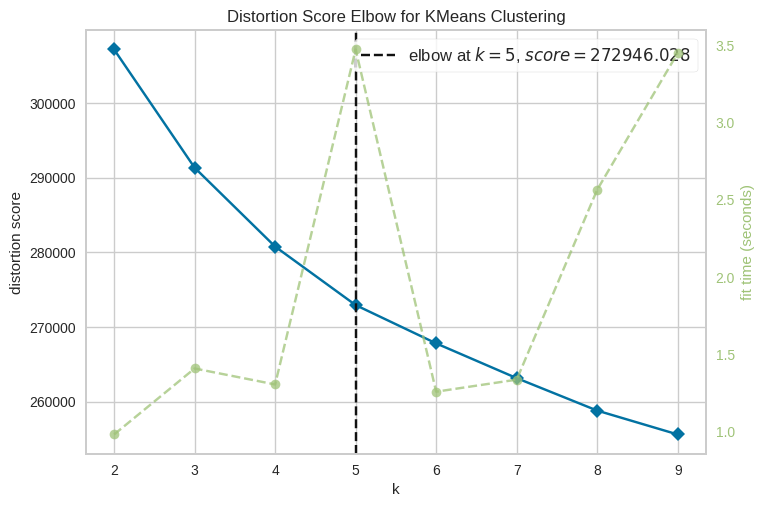

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
visualizer.fit(data_sample)
visualizer.poof()

Instacia o KMeans em 5 grupos

In [14]:
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
predicoes = k_fit.labels_ #rotula os grupos para ter as informações do grup
data['Clusters'] = predicoes

In [16]:
data["Clusters"].value_counts()

Clusters
0    1856
2    1850
3    1802
1    1750
4    1449
Name: count, dtype: int64

In [17]:
data.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.21,3.23,3.27,3.58,3.08,2.64,2.36,3.95,2.39,4.07,3.44,3.20,4.10,2.74,2.82,2.78,2.84,2.37,2.92,2.50,1.85,4.03,1.62,4.36,1.97,4.20,1.96,4.01,4.17,3.68,3.85,2.19,4.26,1.96,3.25,2.09,4.11,2.06,3.83,3.85,3.41,2.24,3.82,2.16,3.65,2.03,3.94,2.76,4.13,3.71
1,1.76,3.77,2.27,4.15,2.31,3.33,1.71,4.14,2.14,4.54,4.23,2.55,4.50,2.17,3.51,3.81,3.91,3.64,3.93,3.88,2.49,3.38,2.57,3.84,2.59,3.80,2.70,3.42,3.65,3.01,2.87,3.25,3.81,3.42,2.12,3.36,3.60,3.06,2.85,3.31,3.46,2.44,3.99,2.24,3.38,2.17,3.64,3.11,4.24,3.62
2,3.39,1.96,3.76,2.55,4.01,1.91,3.58,2.84,3.74,3.15,3.91,2.94,4.31,2.38,3.33,3.59,3.85,3.51,3.77,3.27,2.15,4.26,2.82,4.16,2.04,3.98,1.92,3.87,4.11,3.82,2.91,3.68,3.85,3.32,2.14,3.57,3.44,2.86,2.94,3.45,3.81,2.21,4.23,2.04,3.91,1.82,3.96,3.44,4.16,4.12
3,3.56,1.81,4.40,2.17,4.36,1.62,3.98,2.74,3.82,2.44,2.46,3.80,3.23,3.28,2.29,2.00,2.23,1.78,2.23,1.72,1.91,4.54,1.80,4.33,1.79,3.97,1.54,4.13,4.19,4.21,3.67,2.70,4.15,1.99,3.10,2.40,3.82,2.04,3.55,3.84,3.83,1.86,4.08,1.88,4.10,1.64,4.26,3.20,4.04,4.26
4,2.38,3.24,2.98,3.41,2.78,2.87,2.39,3.56,2.90,3.85,2.47,3.79,3.11,3.08,2.49,2.12,2.50,2.10,2.71,2.33,3.15,3.15,2.76,2.89,3.21,2.73,3.03,2.98,2.73,3.16,3.25,2.92,3.78,2.56,2.39,2.85,3.49,2.67,2.89,3.44,3.62,2.15,3.71,2.30,3.69,2.17,4.01,3.17,3.70,3.72


Separa em grupos por tipo de resposta

In [18]:
col_list = list(data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

separa os valores de cada grupo dando nome para a categoria e faz a soma

In [19]:
data_soma = pd.DataFrame()
data_soma['extroversion'] = data[ext].sum(axis=1)/10
data_soma['neurotic'] = data[est].sum(axis=1)/10
data_soma['agreeable'] = data[agr].sum(axis=1)/10
data_soma['conscientious'] = data[csn].sum(axis=1)/10
data_soma['open'] = data[opn].sum(axis=1)/10
data_soma['clusters'] = predicoes

Mostra o valor médio de cada grupo

In [20]:
data_soma.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.08,2.97,3.19,3.15,3.19
1,3.01,3.61,3.15,3.17,3.23
2,3.09,3.49,3.31,3.22,3.37
3,3.09,2.50,3.24,3.13,3.32
4,3.04,2.67,2.98,3.02,3.22


Cria vizualização das médias por grupo

In [21]:
data_clusters = data_soma.groupby('clusters').mean()

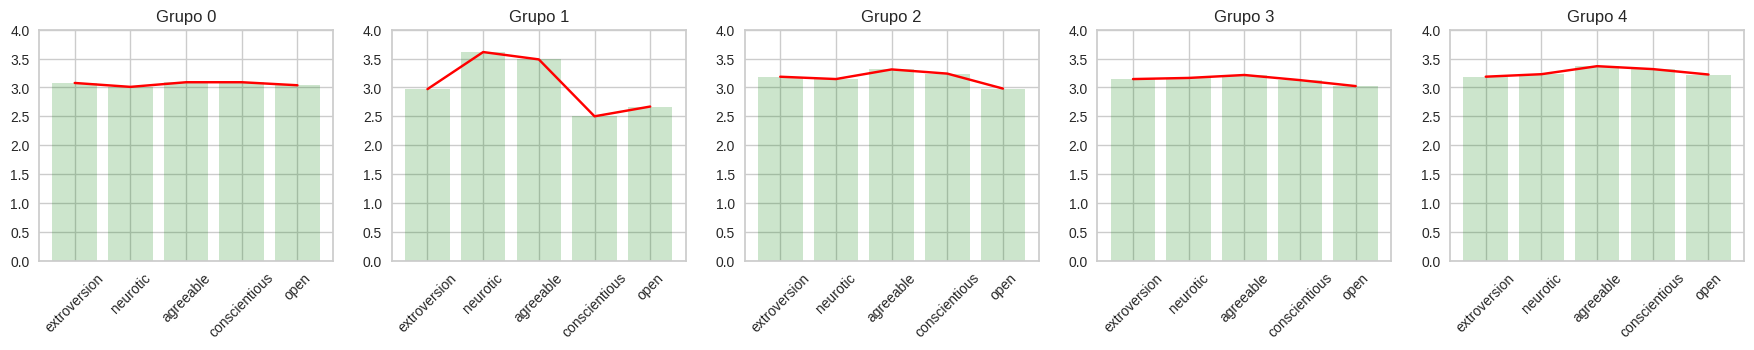

In [22]:
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(data_clusters.columns, data_clusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(data_clusters.columns, data_clusters.iloc[:, i], color='red')
    plt.title('Grupo ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);

Desenvolve planilha para entrar os dados: usuário entra os dados dele e descobre no final em qual categoria ele é descrito

In [23]:
data[:0].to_excel("perguntas.xlsx",index=False)

Recuperando os dados

In [25]:
meus_dados = pd.read_excel('/content/perguntas.xlsx')

Passa os meus dados para o método predicao do kmeans

In [26]:

grupo_personalidade = k_fit.predict(meus_dados)[0]
print('Meu grupo de personalidade é: ', grupo_personalidade)

Meu grupo de personalidade é:  4


Outra forma mais interessante...

Instalando a biblioteca gradio

In [27]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.5 MB/s 

In [28]:
import gradio as gr

Lendo os dados com as questões.

In [29]:
dicio_questions = open("/content/questions.txt").read().split("\n")

In [30]:
dicio_questions

['EXT1\tI am the life of the party.',
 "EXT2\tI don't talk a lot.",
 'EXT3\tI feel comfortable around people.',
 'EXT4\tI keep in the background.',
 'EXT5\tI start conversations.',
 'EXT6\tI have little to say.',
 'EXT7\tI talk to a lot of different people at parties.',
 "EXT8\tI don't like to draw attention to myself.",
 "EXT9\tI don't mind being the center of attention.",
 'EXT10\tI am quiet around strangers.',
 'EST1\tI get stressed out easily.',
 'EST2\tI am relaxed most of the time.',
 'EST3\tI worry about things.',
 'EST4\tI seldom feel blue.',
 'EST5\tI am easily disturbed.',
 'EST6\tI get upset easily.',
 'EST7\tI change my mood a lot.',
 'EST8\tI have frequent mood swings.',
 'EST9\tI get irritated easily.',
 'EST10\tI often feel blue.',
 'AGR1\tI feel little concern for others.',
 'AGR2\tI am interested in people.',
 'AGR3\tI insult people.',
 "AGR4\tI sympathize with others' feelings.",
 "AGR5\tI am not interested in other people's problems.",
 'AGR6\tI have a soft heart.',


Limpando os dados e recuperando apenas as questões

In [31]:
questions = []
for q in dicio_questions:
    q = str(q)
    questions.append(q[q.find("\t"):].lstrip())

In [32]:
questions

['I am the life of the party.',
 "I don't talk a lot.",
 'I feel comfortable around people.',
 'I keep in the background.',
 'I start conversations.',
 'I have little to say.',
 'I talk to a lot of different people at parties.',
 "I don't like to draw attention to myself.",
 "I don't mind being the center of attention.",
 'I am quiet around strangers.',
 'I get stressed out easily.',
 'I am relaxed most of the time.',
 'I worry about things.',
 'I seldom feel blue.',
 'I am easily disturbed.',
 'I get upset easily.',
 'I change my mood a lot.',
 'I have frequent mood swings.',
 'I get irritated easily.',
 'I often feel blue.',
 'I feel little concern for others.',
 'I am interested in people.',
 'I insult people.',
 "I sympathize with others' feelings.",
 "I am not interested in other people's problems.",
 'I have a soft heart.',
 'I am not really interested in others.',
 'I take time out for others.',
 "I feel others' emotions.",
 'I make people feel at ease.',
 'I am always prepared.

Criando os inputs dinamicos para passar ao gradio

In [33]:
inputs_questions = []
for q in questions:
    obj_input = gr.Slider(minimum=1, maximum=5, step=1, value=3, label=q)
    inputs_questions.append(obj_input)

In [34]:
inputs_questions

Criando a interface e a função predict.

In [35]:
def predict(*outputs_questions):
    outputs_questions = np.array(outputs_questions).reshape(1, -1)
    return k_fit.predict(outputs_questions)

iface = gr.Interface(
                    fn = predict,
                    title = "Big Five Personality",
                    description = "Sistema para detecção de traços de personalidade.",
                    inputs = inputs_questions,
                    outputs="text")
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://344a5fbf68f096acf8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
